# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

### Web Scraping 
- Their code just web scraped the review, while I also added the date and the location of the user's home country

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 75
page_size = 100

reviews = []
dates = []
locations = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    
    # Find and add the review to a list
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    # Find and add the date to a list
    for para in parsed_content.find_all("time", {"itemprop": "datePublished"}):
        dates.append(para.get_text())
    
    # Find and add the location to the list
    for para in parsed_content.find_all("h3", {"class": "text_sub_header"}):
        text = para.get_text()
        location_text = text.split("(")[-1].split(")")[0]  # Extracts text between parentheses
        locations.append(location_text.strip())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df["dates"] = dates
df["locations"] = locations
df.head()

,reviews,dates,locations
0,Not Verified | We have flown BA five times fr...,17th February 2024,United States
1,✅ Trip Verified | London Heathrow to Istanbul...,17th February 2024,United Kingdom
2,"Not Verified | Jan 30th, I booked a last-minut...",16th February 2024,United States
3,✅ Trip Verified | I am a British Airways Gold ...,11th February 2024,United States
4,Not Verified | Another case of reviewing Brit...,8th February 2024,United Kingdom


In [4]:
df.to_csv("data\BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

### Dataset Cleaning

In [5]:
import re

In [6]:
# Pre cleaning review output
pre = df.iloc[0]['reviews']
print(pre)

Not Verified |  We have flown BA five times from western USA to England. Always decent service. Never again. If you have a problem their website is impossible to navigate. It’s terrible,  takes you in endless repeating circles and loops that never lead to any resolutions. They lost our suitcase. We spent hours upon our arrival in Lisbon trying to navigate their website. It was frustrating and fruitless. Three days into our trip and we still are waiting for our clothing and toiletries and electronics. Can we talk to a real person? No. It’s impossible. We have even quit thinking about the $396 we spent to secure seats in Economy that turned out to have no extra legroom. We paid $400 extra for nothing. We are done with BA. Whoops, not quite. We still have to get home.


In [7]:
# Get rid of ✅ and ❎ symbol
df['reviews'] = df['reviews'].str.replace('✅ ', '')
df['reviews'] = df['reviews'].str.replace('❎ ', '')

# Function to check if the review starts with "Trip Verified" or "Not Verified or other terms"
def is_verified(review):
    if review.startswith('Trip Verified') or review.startswith('Verified Review'):
        return 1
    elif review.startswith('Not Verified') or review.startswith('cNot Verified') or review.startswith('Unverified'): # add in check for column with 'cNot Verified'
        return 0
    else:
        return 0

# Apply the function to create the new "Verified" column where 1 is "trip verified" and 0 is "not verified"
df['Verified'] = df['reviews'].apply(lambda x: is_verified(x))

# Remove the prefix "Not Verified | " or "Trip Verified | " from the reviews
df['reviews']= df['reviews'].str.replace('Unverified | ', '', regex=False)
df['reviews']= df['reviews'].str.replace('cNot Verified | ', '', regex=False)
df['reviews'] = df['reviews'].str.replace('Not Verified | ', '', regex=False)
df['reviews'] = df['reviews'].str.replace('Trip Verified | ', '', regex=False)

In [8]:
# Strip string
df['reviews'] = df['reviews'].str.strip()
# Convert to lowercase
df['reviews'] = df['reviews'].str.lower()

# get rid of special characters
pattern = r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"
df['reviews'] = df['reviews'].str.replace(pattern, "", regex=True)

In [9]:
# Post cleaning review output 
post = df.iloc[0]['reviews']
print(post)

we have flown ba five times from western usa to england always decent service never again if you have a problem their website is impossible to navigate its terrible  takes you in endless repeating circles and loops that never lead to any resolutions they lost our suitcase we spent hours upon our arrival in lisbon trying to navigate their website it was frustrating and fruitless three days into our trip and we still are waiting for our clothing and toiletries and electronics can we talk to a real person no its impossible we have even quit thinking about the 396 we spent to secure seats in economy that turned out to have no extra legroom we paid 400 extra for nothing we are done with ba whoops not quite we still have to get home


In [10]:
# Changes for where df['locations'] is 'S Stevenson 8th April 2015' or 'Guillaume Christian 20th October 2014'
mask = (df['locations'] == 'S Stevenson 8th April 2015') | (df['locations'] == "Guillaume Christian 20th October 2014")

# Update the 'locations' column to be empty string where the condition is met
df.loc[mask, 'locations'] = ""

In [11]:
from datetime import datetime

# Example function to convert date string to datetime object
def convert_to_datetime(date_str):
    # Remove ordinal indicators (e.g., 'st', 'nd', 'rd', 'th')
    date_str = date_str.replace('st', '').replace('nd', '').replace('rd', '').replace('th', '')
    
    # Map abbreviated or misspelled month names to their full names
    month_mapping = {
        'Augu': 'August',
        'Februaryary': 'February'  # Add misspelled month names
    }
    
    # Replace abbreviated or misspelled month names with their full names
    for key, value in month_mapping.items():
        if key in date_str:
            date_str = date_str.replace(key, value)

    return datetime.strptime(date_str, '%d %B %Y')

# Apply the conversion function to the entire column
df["dates"] = df["dates"].apply(lambda x: convert_to_datetime(x))

### Data Analysis

In [12]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))


There are 3752 observations and 4 features in this dataset. 



In [13]:
print(df.columns)

Index(['reviews', 'dates', 'locations', 'Verified'], dtype='object')


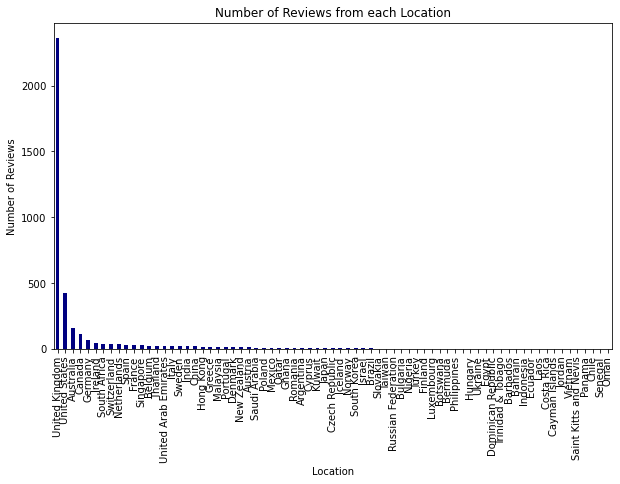

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

location_counts = df['locations'].value_counts()

plt.figure(figsize=(10,6))
location_counts.plot(kind = 'bar', color = 'navy')
plt.title('Number of Reviews from each Location')
plt.xlabel('Location')
plt.ylabel('Number of Reviews')
plt.show()


In bar graph above, British Airlines gets most of their reviews from the UK and the second most from the US. Additionally, Australia and Canada are the third and fourth most common reviews, but no other country compares to the UK. Therefore, it might be smarter to focus on what the UK reviews say if most of the fights are for those people.

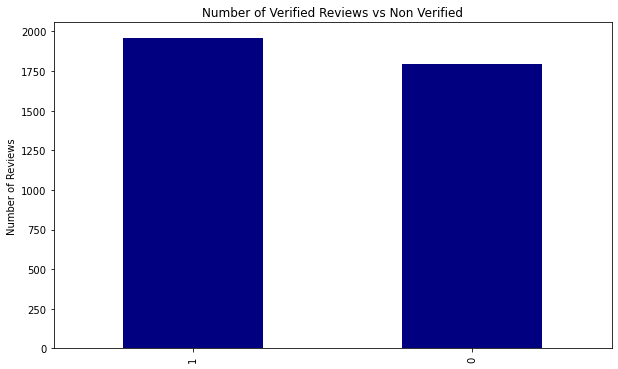

In [15]:
location_counts = df['Verified'].value_counts()

plt.figure(figsize=(10,6))
location_counts.plot(kind = 'bar', color = 'navy')
plt.title('Number of Verified Reviews vs Non Verified')
plt.ylabel('Number of Reviews')
plt.show()

The reviews are split fairly evenly between verified and non-verified reviews, so I should investigate later if this makes a difference in what they mention.

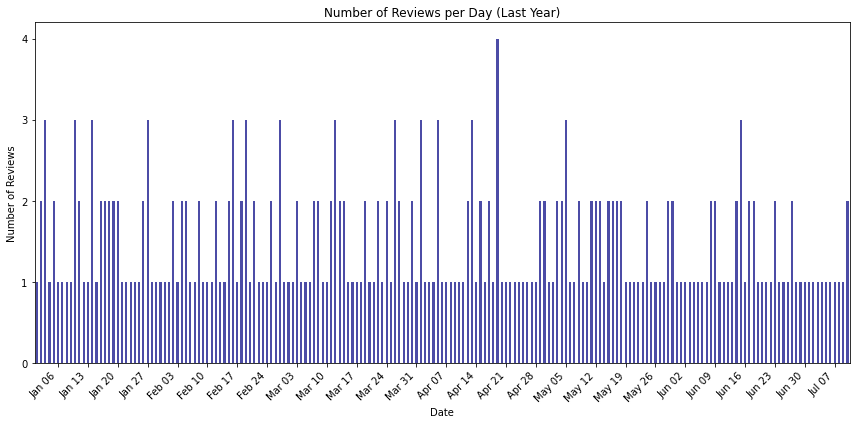

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Assuming 'dates' column needs to be converted to datetime format
df['dates'] = pd.to_datetime(df['dates'])

# Filter data for the last two years
current_date = pd.Timestamp.now()
two_years_ago = current_date - pd.DateOffset(years=1)
df_filtered = df[df['dates'] >= two_years_ago]

# Group the filtered DataFrame by date and count the number of reviews for each date
review_counts = df_filtered['dates'].value_counts().sort_index()

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data as a bar chart
review_counts.plot(kind='bar', color='navy', alpha=0.7, ax=ax)

# Set title, labels
ax.set_title('Number of Reviews per Day (Last Year)')
ax.set_ylabel('Number of Reviews')
ax.set_xlabel('Date')

# Set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())

# Format date
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set y-axis ticks to integers only
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()



Based on the chart above, which shows the number of reviews from the last year, British airlines consistently get between 0 and 4 reviews a day. Additionally, no spikes indicate that something went significantly wrong or that a major change must be made immediately.

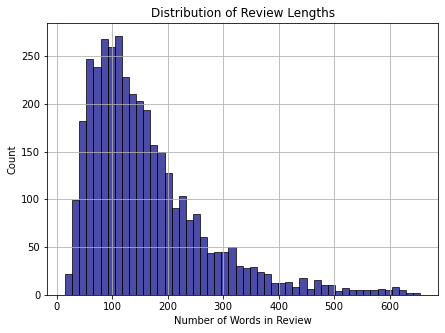

In [17]:
# Calculate word counts for each review
df['word_count'] = df['reviews'].apply(lambda x: len(x.split()))

# Plot the frequency of word counts
plt.figure(figsize=(7, 5))
plt.hist(df['word_count'], bins=50, color='navy', edgecolor='black', alpha=0.7)
plt.xlabel('Number of Words in Review')
plt.ylabel('Count')
plt.title('Distribution of Review Lengths')
plt.grid(True)
plt.show()


Based on the chart above, most of the reviews have a word length of 50 to 250 words. Future work could look into if longer reviews are more negative or if there is just more written.

### Word Clouds

In [18]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

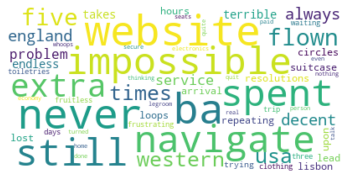

In [19]:
text = df.reviews[0]

wordcloud = WordCloud(max_font_size = 50, max_words = 100, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

Before removing stop words some common words, seen in the reviews are website, never, navigate, impossible, extra, etc. Maybe there is a UI issue with our website. Further investigation should be conducted into this.

In [20]:
# Code to save image to folder
wordcloud.to_file("img/first_review.png")

In [21]:
text = " ".join(review for review in df.reviews)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 3267131 words in the combination of all review.


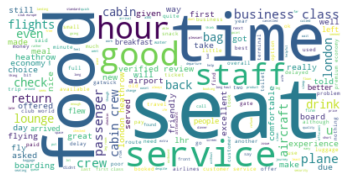

In [22]:
# create stopwords list
stopwords = set(STOPWORDS)
stopwords.update(["ba", "now", "flight", "british", "airways", "one", "airline"])

wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

After removing stop words, common terms seen in the reviews include food, seat, service, and time. These words are common when we are dealing with airlines due to in-flight service. In further work, British Airlines should investigate if these are positive comments about the service or if they need to be improved.

### Word Clouds for specific countries

In [23]:
# Get the counts of each location
location_counts = df['locations'].value_counts()

# Get the five most popular locations
top_locations = location_counts.head(4)

# Print the counts of the five most popular locations
print("Top 5 Most Popular Locations:")
print(top_locations)

Top 5 Most Popular Locations:
United Kingdom    2359
United States      422
Australia          157
Canada             116
Name: locations, dtype: int64


In [24]:
uk = " ".join(review for review in df[df["locations"] == "United Kingdom"].reviews)
usa = " ".join(review for review in df[df["locations"] == "United States"].reviews)

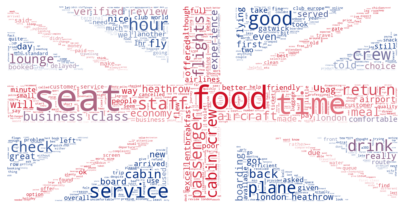

In [25]:
# Generate a word cloud image
mask = np.array(Image.open("img/UK.png"))
wordcloud_uk = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(uk)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_uk.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("img/uk_review.png", format="png")

plt.show()

Given that the UK accounts for the highest number of reviews, it is crucial to prioritize their feedback. Furthermore, considering the company's name is British Airlines, it stands to reason that the UK represents a significant portion of its clientele. The prevalent themes in UK reviews center around food, seating, and time. Consequently, British Airlines should concentrate on enhancing its service offerings for these flights.

In [ ]:
# Generate a word cloud image
mask = np.array(Image.open("img/usa.png"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(usa)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("img/us_reviews.png", format="png")

plt.show()

Overall, the US reviews seem to have a wide range of topics, from service and baggage to food and drink. But for the most part, there seems to be positive sentiment with words such as comfortable and nice.

### Check the most common phrases within the 2 last years

In [ ]:
# Filter data for the last two years
current_date = pd.Timestamp.now()
two_years_ago = current_date - pd.DateOffset(years=2)
df_filtered = df[df['dates'] >= two_years_ago]

In [ ]:
location_counts = df_filtered['locations'].value_counts()

plt.figure(figsize=(10,6))
location_counts.plot(kind = 'bar', color = 'navy')
plt.title('Number of Reviews from each Location')
plt.xlabel('Location')
plt.ylabel('Number of Reviews')
plt.show()

Next, when looking at the number of reviews in the last two years, the UK has the most reviews, and the US has the second most. These two countries again make up most of the reviews and therefore, British Airlines should focus our work on this base.

In [ ]:
uk_filtered = " ".join(review for review in df_filtered[df_filtered["locations"] == "United Kingdom"].reviews)
usa_filtered = " ".join(review for review in df_filtered[df_filtered["locations"] == "United States"].reviews)

In [ ]:
# Generate a word cloud image
mask = np.array(Image.open("img/UK.png"))
wordcloud_uk = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(uk_filtered)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_uk.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("img/uk_filtered.png", format="png")

plt.show()

The UK reviews again focus on the service, the food, and the seats and many use the term good, so these reviews seem to be positive for the most part.

In [ ]:
# Generate a word cloud image
mask = np.array(Image.open("img/usa.png"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(usa_filtered)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("img/us_filtered.png", format="png")

plt.show()

The US reviews seem to have changed slightly, two common words are now customer and service, so British airlines may look into how their customer service is doing to make sure it is accessible and usable for the customers. Another word that sticks out is luggage and lost so it could be possible that the international flights are having issues with luggage getting on the correct plane.

## Conclusions

The analysis of British Airlines based on the reviews from Skytrax presented several key insights. Firstly, the consistent number of daily reviews, coupled with the absence of significant spikes, indicates a stable operational performance without immediate major concerns. The distribution of reviews from various countries, with the UK being the primary source, suggests the importance of focusing on UK feedback for tailored improvements, given the airline's British identity and clientele. Next, the word length analysis underscores the prevalence of concise reviews, prompting further exploration into whether longer reviews correlate with specific sentiments. Moreover, identifying common terms before and after removing stop words offers valuable clues, such as potential UI issues on the customer service website and recurring themes like food, seat, and service quality. Notably, UK reviews consistently emphasize aspects like food, seat comfort, and service quality, indicating positive sentiments overall. Conversely, shifts in common terms in US reviews highlight evolving customer concerns, particularly regarding customer service accessibility and luggage handling for international flights. As the UK and the US have contributed significantly to the review base over the last two years, prioritizing actions based on their feedback emerges as a strategic imperative. In essence, by leveraging these insights and focusing on addressing customer feedback, British Airlines can enhance its service quality, reinforce customer satisfaction, and maintain competitiveness in the aviation industry.